In [2]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

In [6]:
data=datasets.load_breast_cancer()
x=data.data
y=data.target
#print(x.shape,y.shape,data.DESCR)

In [17]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
kf=KFold(n_splits=10)
skf=StratifiedKFold(n_splits=10)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
model=SVC()
model.fit(xtrain,ytrain)
print(accuracy_score(ytest,model.predict(xtest)))

0.9064327485380117


In [15]:
from sklearn.metrics import accuracy_score
import numpy as np
result=[]
for trainindex,testindex in kf.split(x,y):
    xtrain,xtest=x[trainindex],x[testindex]
    ytrain,ytest=y[trainindex],y[testindex]
    model=SVC()
    model.fit(xtrain,ytrain)
    #print(accuracy_score(ytest,model.predict(xtest)))
    result.append(accuracy_score(ytest,model.predict(xtest)))
print(result,np.average(result))

[0.7017543859649122, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9821428571428571] 0.9157581453634085


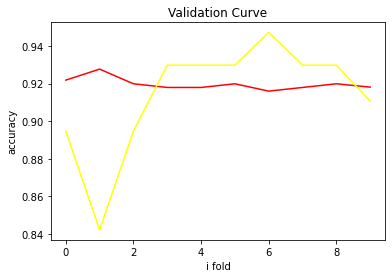

In [30]:
import matplotlib.pyplot as plt
train=[]
test=[]
for trainindex,testindex in skf.split(x,y):
    xtrain,xtest=x[trainindex],x[testindex]
    ytrain,ytest=y[trainindex],y[testindex]
    model=SVC()
    model.fit(xtrain,ytrain)
    train.append(accuracy_score(ytrain,model.predict(xtrain)))
    test.append(accuracy_score(ytest,model.predict(xtest)))
plt.title("Validation Curve")
plt.xlabel("i fold")
plt.ylabel("accuracy")
plt.plot(np.arange(0,10),train,c="red",label="train")
plt.plot(np.arange(0,10),test,c="yellow",label="test")
plt.show()

In [19]:
from sklearn.model_selection import cross_validate

In [22]:
cv=cross_validate(SVC(),x,y,cv=5)

In [25]:
print(cv,np.average(cv['test_score']))

{'fit_time': array([0.01026058, 0.01290369, 0.00539064, 0.00748253, 0.00826931]), 'score_time': array([0.        , 0.00445509, 0.0092268 , 0.00812578, 0.        ]), 'test_score': array([0.85087719, 0.89473684, 0.92982456, 0.94736842, 0.9380531 ])} 0.9121720229777983


In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
paramlist={'C':[0.1,1,10,100],
      'kernel':['linear','poly','rbf']}
grid=GridSearchCV(SVC(),paramlist)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [39]:
print(accuracy_score(ytest,grid.predict(xtest)))
print(grid.best_params_)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,grid.predict(xtest)))
print(classification_report(ytest,grid.predict(xtest)))

0.9642857142857143
{'C': 100, 'kernel': 'linear'}
[[20  1]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        35

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56

